In [1]:
import cv2
import matplotlib.pyplot as plt
# %matplotlib inline
import pandas as pd
import os
import numpy as np
import math

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/My Drive/Colab Notebooks/data/handwriting /handwrite_take2.h5')

In [4]:
import pickle
with open('/content/drive/My Drive/Colab Notebooks/data/handwriting /label_classes', 'rb') as f:
  label_classes = pickle.load(f)

In [5]:
print(label_classes)

['1' '2' '3' '4' '5' '6' '7' '8' 'It' 'a' 'about' 'activities' 'addiction'
 'allows' 'amounts' 'and' 'anxiety' 'aspects' 'at' 'attempting' 'be'
 'behavioral' 'break' 'can' 'chat' 'compete' 'computer' 'connection'
 'constant' 'create' 'curves' 'day' 'depression' 'develop' 'discharge'
 'do' 'done' 'drug' 'efforts' 'enjoy' 'events' 'extent' 'fantasy' 'feet'
 'for' 'for ' 'friends' 'guilt' 'has' 'horizontal' 'human' 'hurry' 'if'
 'internet' 'know' 'like' 'long' 'makes' 'may' 'meet' 'mood' 'no' 'not'
 'of' 'on' 'one' 'opening' 'or' 'other' 'others' 'our' 'out' 'people'
 'per' 'personal' 'plan' 'plotting' 'points' 'poor' 'positive' 'real'
 'remember' 'results' 'short' 'similar' 'social' 'sollowing' 'some'
 'speed' 'spinning' 'start' 'stress' 'study' 'substitution' 'suffer'
 'suffering' 'tasks' 'tend' 'than' 'that' 'the' 'there' 'things'
 'thoughts' 'times' 'to' 'top' 'type' 'upon' 'us' 'users' 'very' 'virtual'
 'wait' 'week' 'which' 'who' 'winging' 'with' 'words' 'world' 'your'
 'youtube']


In [7]:
def get_label(img):
  img_size_w = 50
  img_size_h = 20 
  # img_array = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
  imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  new_array = cv2.resize(img, (img_size_w, img_size_h))
  array = new_array.reshape(-1, img_size_w, img_size_h, 1)
  pred = model.predict(array)
  y = np.argmax(pred)
  print("the class no. is", y)
  predicted_word = label_classes[y]
  return predicted_word

In [8]:
def createKernel(kernelSize, sigma, theta):
	"""create anisotropic filter kernel according to given parameters"""
	assert kernelSize % 2 # must be odd size
	halfSize = kernelSize // 2
	
	kernel = np.zeros([kernelSize, kernelSize])
	sigmaX = sigma
	sigmaY = sigma * theta
	
	for i in range(kernelSize):
		for j in range(kernelSize):
			x = i - halfSize
			y = j - halfSize
			
			expTerm = np.exp(-x**2 / (2 * sigmaX) - y**2 / (2 * sigmaY))
			xTerm = (x**2 - sigmaX**2) / (2 * math.pi * sigmaX**5 * sigmaY)
			yTerm = (y**2 - sigmaY**2) / (2 * math.pi * sigmaY**5 * sigmaX)
			
			kernel[i, j] = (xTerm + yTerm) * expTerm

	kernel = kernel / np.sum(kernel)
	return kernel

In [9]:
kernel = createKernel(91, 27, 19)

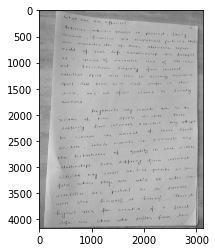

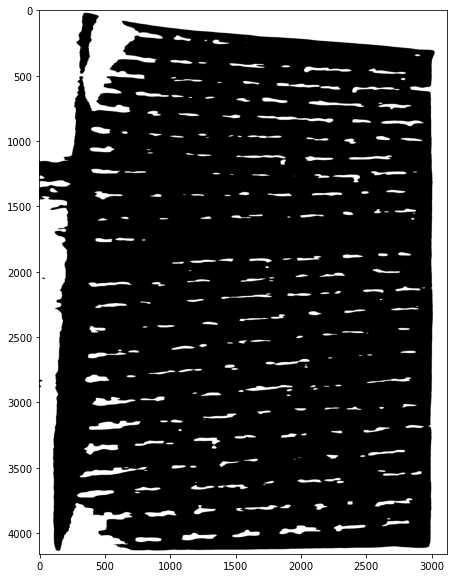

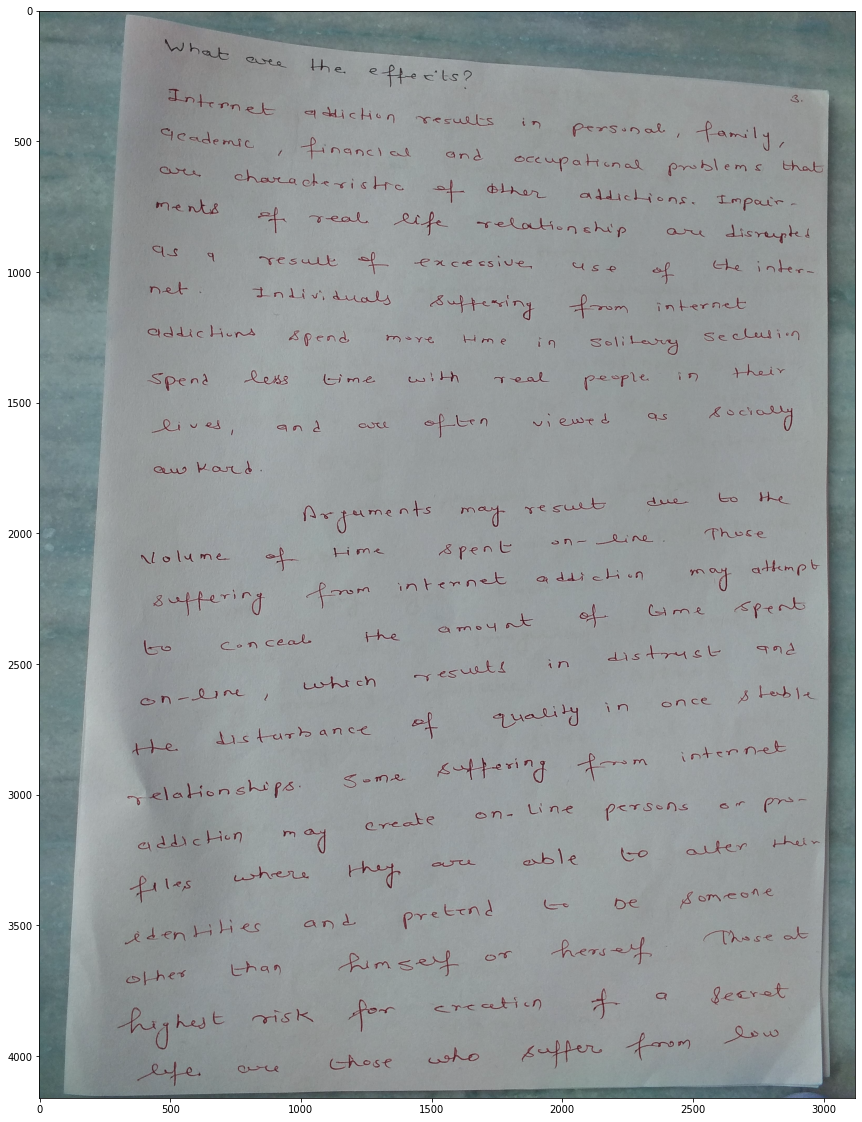

In [15]:
dir = '/content/drive/My Drive/Colab Notebooks/data/handwriting /IMG_20201017_153538.jpg'
#read image
image = cv2.imread(dir)

#prepare image and convert height
imgray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(imgray, cmap='gray')

#apply threshold and filter 
imgFiltered = cv2.filter2D(imgray, -1, kernel, borderType=cv2.BORDER_REPLICATE).astype(np.uint8)
ret3,thresh = cv2.threshold(imgFiltered,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
thresh = 255 - thresh

plt.figure(figsize = (20,10))
plt.imshow(thresh, cmap='gray')

# find contours
(components, _) = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
res = []
i=0
for c in components:
  # skip small word candidates
  if cv2.contourArea(c) < 350:
    continue
  # append bounding box and image of word to result list
  currBox = cv2.boundingRect(c) # returns (x, y, w, h)
  (x, y, w, h) = currBox
  currImg = image[y:y+h, x:x+w]
  res.append((currBox, currImg))
  res = sorted(res, key=lambda entry:entry[0][0])
  

plt.figure(figsize=(30,20))
plt.imshow(image)

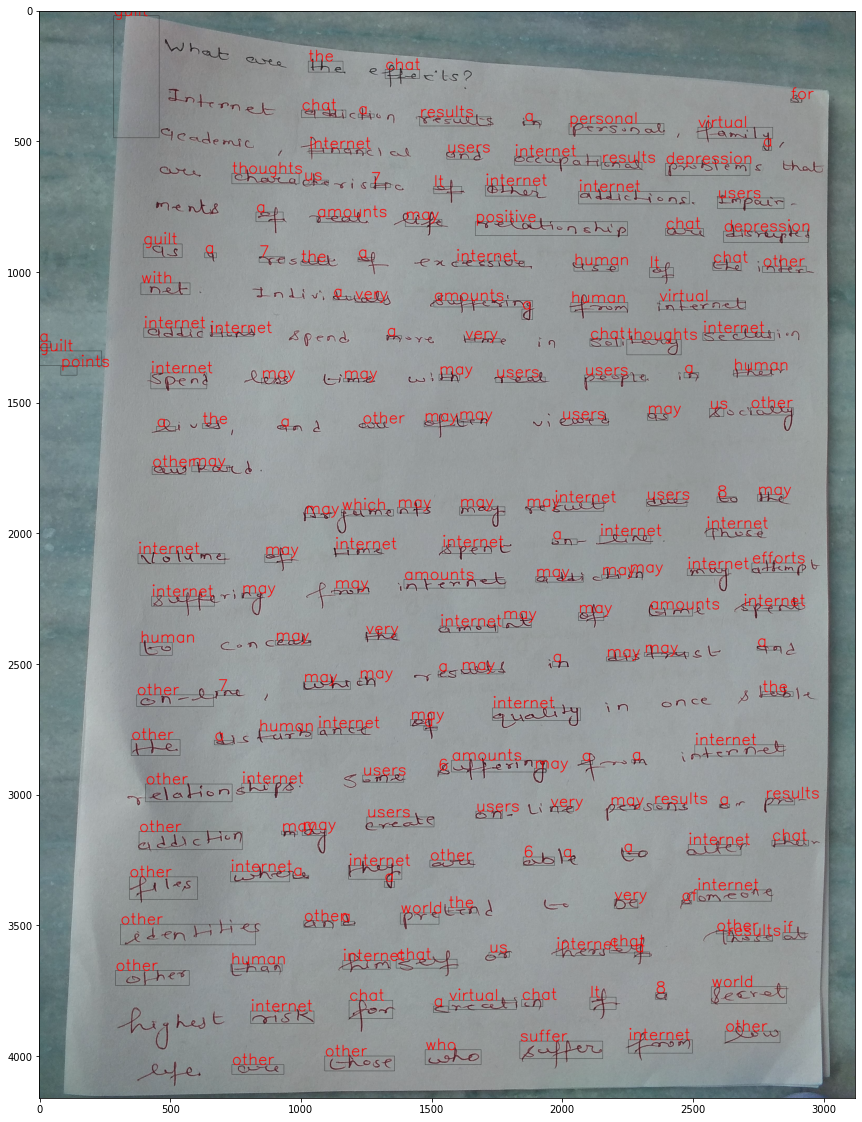

In [16]:
for box,img in res:
  
  imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  new_array = cv2.resize(imgray, (50, 20))
  array = new_array.reshape(-1, 50, 20, 1)
  pred = model.predict(array)
  y = np.argmax(pred)
  pred_word = label_classes[y]
  
  (x, y, w, h) = box
  cv2.rectangle(image,(x,y),(x+w,y+h),0,1)
  cv2.putText(image,pred_word, (x, y), cv2.FONT_HERSHEY_SIMPLEX, 2,(255, 0, 0),2,cv2.LINE_AA)
  # print(pred_word)
  
plt.figure(figsize=(30,20))
plt.imshow(image, cmap='gray')